<a href="https://colab.research.google.com/github/dhruvmittal41/Task_1-Data-cleaning-Preprocessing/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#importing all the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
#loading the titanic dataset and fetching few rows to get a estimate of the data.
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Checking Dataset for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
#Handling Missing Value

#For Age Feature
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

#For Cabin Feature(Since too many missing values)
df.drop('Cabin', axis=1, inplace=True)

#For Embarked Feature
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-4-2204d2263eff>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median, inplace=True)
<ipython-input-4-2204d2263eff>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [5]:
#Checking if null values are taken care of or not.
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
#Converting Categorical features into numerical using enconding.

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])
df['Embarked'] = LE.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [11]:
#Normalizing/Standardising the numerical features.

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age','Fare']])
df[['Age','Fare']] = scaled_data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2


Text(0.5, 1.0, 'Age Boxplot')

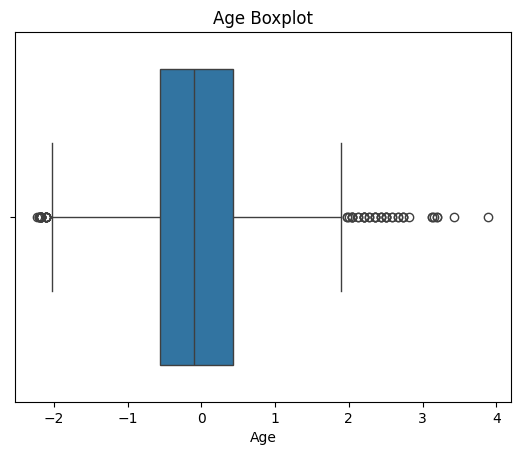

In [20]:
#Visualizing Outliers via Boxplots

sns.boxplot(x =df['Age'])
plt.title("Age Boxplot")





Text(0.5, 1.0, 'Fare Boxplot')

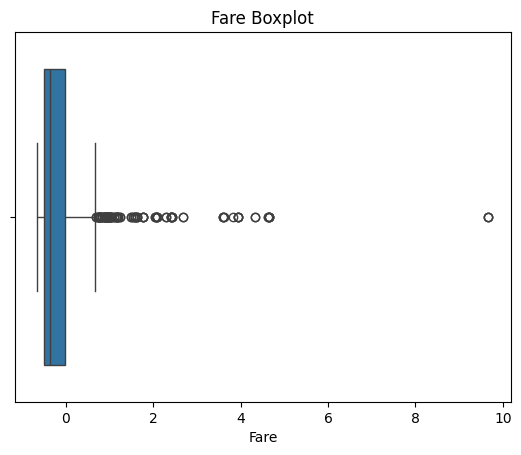

In [17]:
sns.boxplot(x =df['Fare'])
plt.title("Fare Boxplot")

In [41]:
#Removing the Outliers

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

Lower_Fence = Q1 - 1.5 * IQR
Upper_Fence = Q3 + 1.5 * IQR

df = df[(df['Age'] >= Lower_Fence) & (df['Age'] <= Upper_Fence)]


Text(0.5, 1.0, 'Age Boxplot')

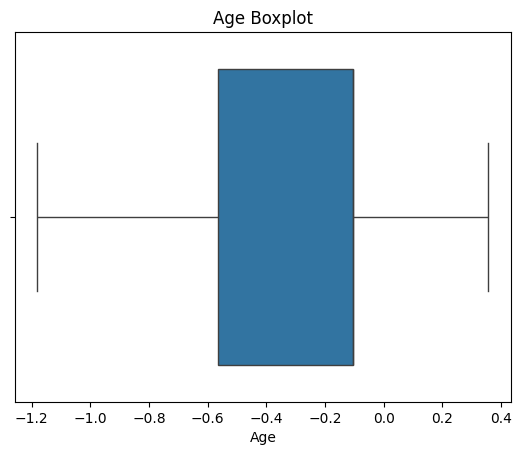

In [42]:
sns.boxplot(x =df['Age'])
plt.title("Age Boxplot")

In [43]:

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

Lower_Fence = Q1 - 1.5 * IQR
Upper_Fence = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= Lower_Fence) & (df['Fare'] <= Upper_Fence)]

Text(0.5, 1.0, 'Fare Boxplot')

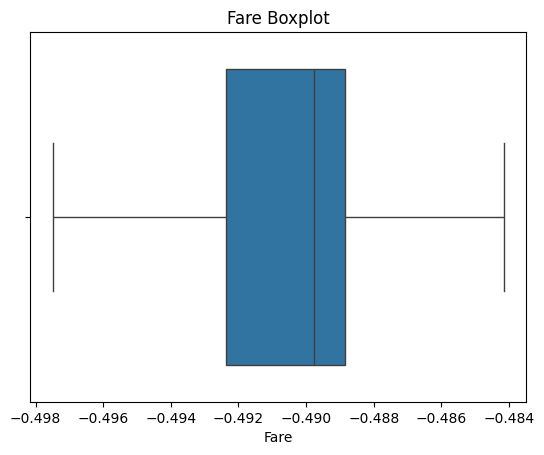

In [44]:
sns.boxplot(x =df['Fare'])
plt.title("Fare Boxplot")